In [1]:
import sys

In [2]:
sys.path.append('../src/')
sys.path.append('../src/lib/data_loaders/')

In [3]:
from util.parse_time import order_based_on_file_timestamp, parseTime, get_next_sequence

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image

In [5]:
len([x for x in range(0, 24 * 60, 15)])

96

In [6]:
[x for x in range(5, 24 * 60, 5)]

[5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355,
 360,
 365,
 370,
 375,
 380,
 385,
 390,
 395,
 400,
 405,
 410,
 415,
 420,
 425,
 430,
 435,
 440,
 445,
 450,
 455,
 460,
 465,
 470,
 475,
 480,
 485,
 490,
 495,
 500,
 505,
 510,
 515,
 520,
 525,
 530,
 535,
 540,
 545,
 550,
 555,
 560,
 565,
 570,
 575,
 580,
 585,
 590,
 595,
 600,
 605,
 610,
 615,
 620,
 625,
 630,
 635,
 640,
 645,
 650,
 655,
 660,
 665,
 670,
 675,
 680,
 685,
 690,
 695,
 700,
 705,
 710,
 715,
 720,
 725,
 730,
 735,
 740,
 745,
 750,
 755,
 760,
 765,
 770,
 775,
 780,
 785,
 790,
 795,
 800,
 805,
 810,
 815,
 820,
 825,
 830,
 835,
 840,
 845,
 850,


In [7]:
satellite_seq_len = 5

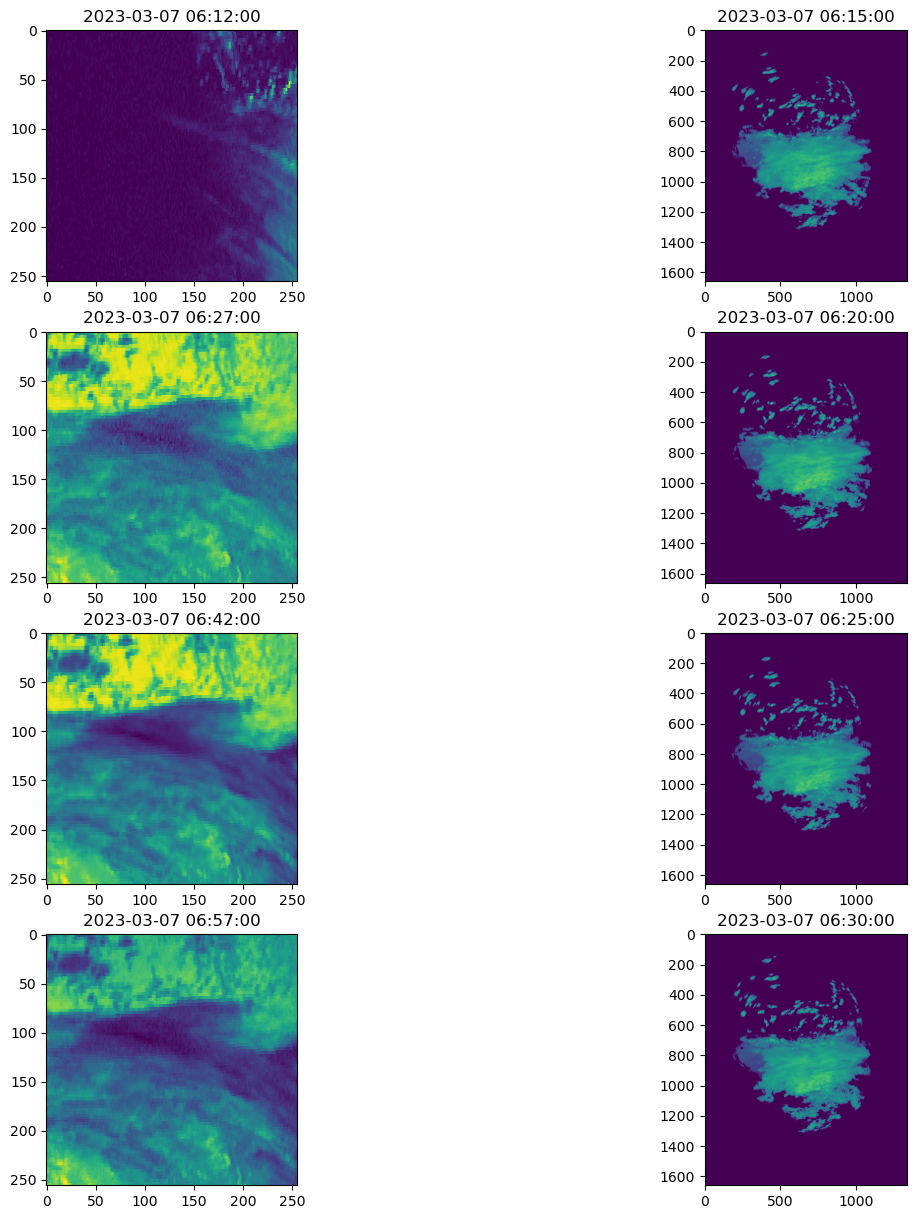

In [8]:
start = 500
sat = order_based_on_file_timestamp(os.listdir('../data/preprocessed/satellite/'))
rad = order_based_on_file_timestamp(os.listdir('../data/preprocessed/radar/'))
imagesSat = [np.load(os.path.join('../data/preprocessed/satellite/', x)) for x in sat[start:start+4]]
radStart, radEnd = get_next_sequence(4, sat[start], rad)
imagesRad = [np.load(os.path.join('../data/preprocessed/radar/', x)) for x in rad[radStart:radStart+4]]
namesSat = [x for x in sat[start:start+4]]
namesRad = [x for x in rad[radStart:radStart+4]]
fig, axes = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(axes)):
    for j in range(len(axes[i])):
        source = imagesSat[:][0] if j % 2 == 0 else imagesRad
        names = namesSat if j % 2 == 0 else namesRad

        axes[i][j].set_title(parseTime(names[i]))
        axes[i][j].imshow(source[i])

upper bound sat 2023-03-03 15:12:00


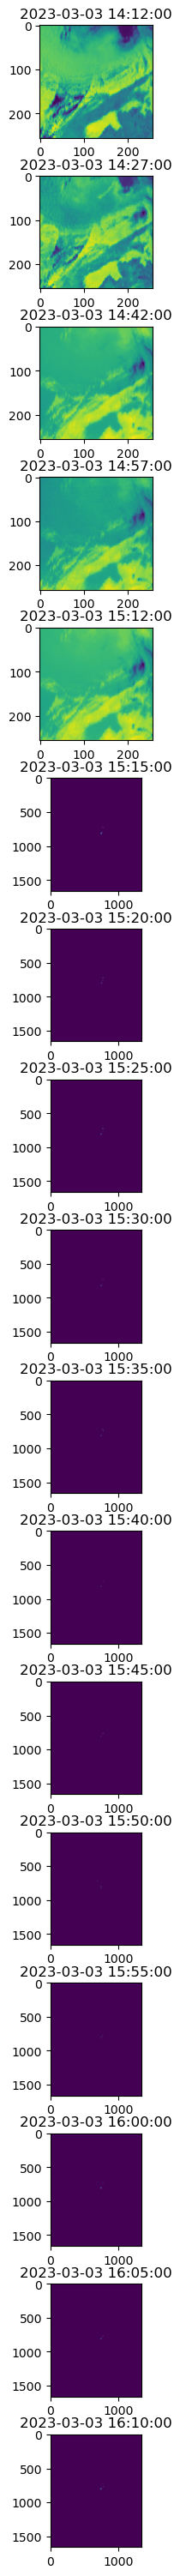

In [9]:
index = 30

lower_bound_satellite = index * satellite_seq_len
upper_bound_satellite = (index + 1) * satellite_seq_len

start = 400

sat = order_based_on_file_timestamp(os.listdir('../data/preprocessed/satellite/'))
rad = order_based_on_file_timestamp(os.listdir('../data/preprocessed/radar/'))

imagesSat = [np.load(os.path.join('../data/preprocessed/satellite/', x)) for x in sat[lower_bound_satellite:upper_bound_satellite]]

print("upper bound sat", parseTime(sat[upper_bound_satellite - 1]))
radStart, radEnd = get_next_sequence(12, sat[upper_bound_satellite - 1], rad)

imagesRad = [np.load(os.path.join('../data/preprocessed/radar/', x)) for x in rad[radStart:radEnd]]
namesSat = [x for x in sat[lower_bound_satellite:upper_bound_satellite]]
namesRad = [x for x in rad[radStart:radEnd]]
fig, axes = plt.subplots(12 + 5, 1)
fig.set_figheight(30)
fig.set_figwidth(15)
fig.tight_layout()
for i in range(len(axes)):
    if i < 5:
        source = imagesSat[:][0]
        names = namesSat
        select = i
    else:
        source = imagesRad
        names = namesRad
        select = i - 5

    axes[i].set_title(parseTime(names[select]))
    axes[i].imshow(source[select])

In [10]:
from lib.data_loaders.ClassDatasetSequence import ClassDatasetSequence
from lib.data_loaders.ClassSlidingSequence import ClassDatasetSlidingWindow

In [11]:
sat = list(map(lambda x: f"../data/preprocessed/satellite/{x}", sat))
rad = list(map(lambda x: f"../data/preprocessed/radar-binned/{x}", rad))

In [12]:
ds = ClassDatasetSequence(sat, rad, radar_seq_len=1)

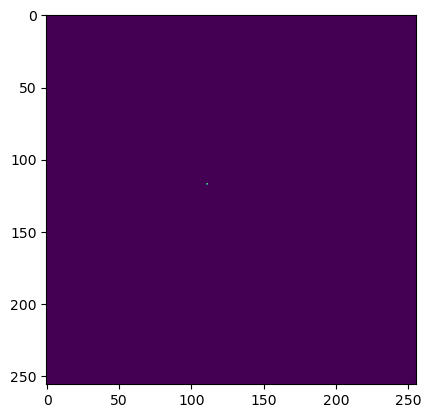

In [13]:
plt.imshow(ds[81][1][0])

In [14]:
ds2 = ClassDatasetSlidingWindow(sat, rad, radar_seq_len=1)

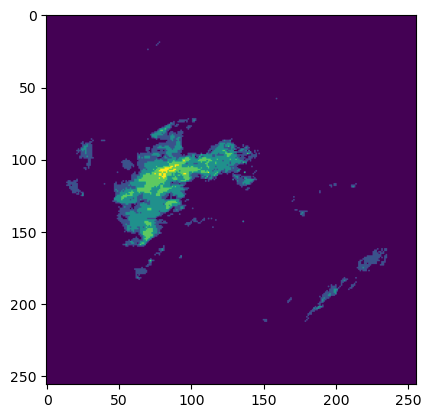

In [29]:
plt.imshow(ds2[296][1][0])

In [16]:
array = [np.load(f"../data/preprocessed/satellite/{x}") for x in sat[:100]]

FileNotFoundError: [Errno 2] No such file or directory: '../data/preprocessed/satellite/../data/preprocessed/satellite/MSG4-SEVI-MSG15-0100-NA-20230301234243.792000000Z-NA.npy'

In [ ]:
array = np.array(array)

In [ ]:
radar = [np.load(f"../data/preprocessed/radar/{x}") for x in rad[:100]]

KeyboardInterrupt: 

In [ ]:
radar = np.array(radar)

In [ ]:
radar.shape

(100, 256, 256)

In [ ]:
array = array * 255
imgs = [Image.fromarray(img) for img in radar]
imgs[0].save(
    f"../logs/rad_viddd.gif",
    save_all=True,
    append_images=imgs[1:],
    duration=50,
    loop=0,
)

In [ ]:
resultss = np.zeros((8))
files = os.listdir('../data/preprocessed/radar-binned/')
for e, file in enumerate(files):
    arra = np.load(f'../data/preprocessed/radar-binned/{file}').astype(int)
    uniques, counts = np.unique(arra, return_counts=True)
    print(uniques)
    for j, clas in enumerate(uniques):
        resultss[clas] += counts[j]

[0 1 2 3 4 5]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5]
[0 1 2 3]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[0 1 2 3 4]
[0 1 2 3 4 5]
[0 1 2 3 4]
[0 1 2 3 4 5 6]
[0 1 2]
[0 1 2]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[0]
[0 1 2 3 4 5]
[0 1 2 3 4 6]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2]
[0 1 2 3 4 5]
[0 1 2 3 4]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2]
[0 1 2 3]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4]
[0 1 2 3 4 5]
[0 1 2 3]
[0 1]
[0 1 2 3 4]
[0 1 2 3 4 5]
[0 1 2]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[0 1 2]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5]
[0 1]
[0 1 2]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4 5 6]
[0

In [ ]:
len(resultss)

8

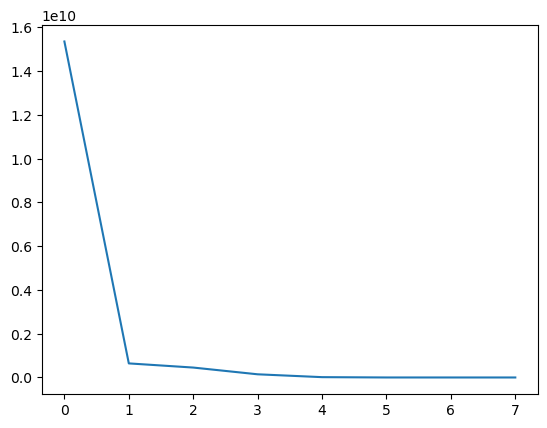

In [ ]:
plt.plot(resultss)

In [ ]:
nresu = resultss / (1660*1340 * len(files))

In [ ]:
xe = 1- nresu
np.sum(xe)

7.0

In [ ]:
xe3 = xe / 7

In [ ]:
sum(xe3)

1.0

In [ ]:
xe3

array([0.01081153, 0.13732371, 0.13895907, 0.1416087 , 0.14272867,
       0.14285409, 0.14285709, 0.14285714])

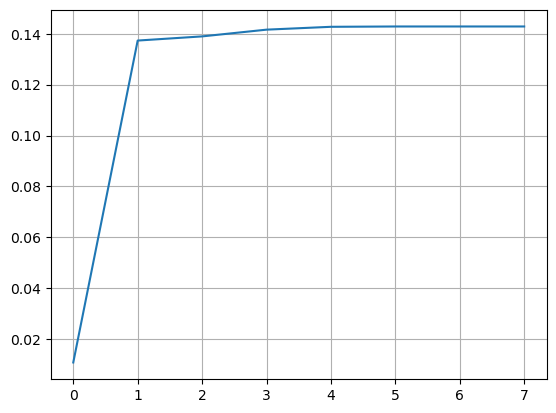

In [3]:
plt.plot([
            0.01081153,
            0.13732371,
            0.13895907,
            0.1416087,
            0.14272867,
            0.14285409,
            0.14285709,
            0.14285714,
        ])
plt.grid()

array([1.08187722e+00, 2.58170801e+01, 3.66481901e+01, 1.14428278e+02,
       1.11194330e+03, 4.68112677e+04, 2.68047556e+06, 1.26841740e+08])

In [ ]:
iii = np.load(f"../data/preprocessed/radar-binned/{files[1]}")

In [ ]:
len(np.unique(iii))

5

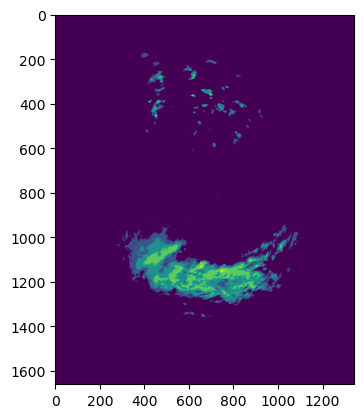

In [ ]:
plt.imshow(iii)

In [ ]:
radar_image = np.arange(0, 256*256).reshape(256, 256)

In [ ]:
def bini(array):
  class_counter = 0
  array[array <= 0] = class_counter
  class_counter += 1
  for i in range(0, 60, 10):
      array[(array > i) & (array <= i + 10)] = class_counter
      class_counter += 1
  array[array > 60] = class_counter
  return array

In [ ]:
np.unique(bini(radar_image))

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
[0.25 for _ in range(8)]

[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]